# MolSSI Workshop - Python Data and Scripting



## Introduction

This lesson covers Python basics like variable creation and assignment using the Jupyter notebook.

In [ ]:
# A Python interpreter can behave like a calculator
3 + 7

In [ ]:
# Assigning variables & doing calculations
deltaH = -541.5   #kJ/mole
deltaS =  10.4     #kJ/(mole K)
temp = 298      #Kelvin
deltaG = deltaH - temp*deltaS

In [ ]:
print(deltaG)

In [ ]:
# variables are immutable
print(deltaG)
deltaG*1000
print(deltaG)

In [ ]:
# If we want to change the value of a variable, we have to overwrite it.
print(deltaG)
deltaG = deltaG*1000
print(deltaG)

In [ ]:
# It is usually a better idea to make a new variable
print(deltaG)
deltaG_joules = deltaG*1000
print(deltaG)
print(deltaG_joules)

In [ ]:
# You can assign multiple variables at once
deltaH, deltaS, temp = -541.5, 10.4, 298
deltaG = deltaH - temp*deltaS
print(deltaG)

In [ ]:
# Data types
type(deltaG)

In [ ]:
# You can change the data type of a variable.
deltaG_string = str(deltaG)
type(deltaG_string)

In [ ]:
print(deltaG_string)

In [ ]:
# Lists can be used to group several values or variables together.

# This is a list
energy_kcal = [-13.4, -2.7, 5.4, 42.1]
# I can determine its length
energy_length = len(energy_kcal)

# print the list length
print('The length of this list is', energy_length)

In [ ]:
# We can access specific elements of a list using integers
# Counting starts at 0

# Print the first element of the list
print(energy_kcal[0])

In [ ]:
# You can use an element of a list as a variable in a calculation

# Calculate the second list element in kilojoules.
energy_kilojoules = energy_kcal[1]*4.184
print(energy_kilojoules)

# Note that this does not change the list
print(energy_kcal)

In [ ]:
# Slicing a list

# Make a new list from elements 0 to 2. Note that it starts with the first
# number, but does not include the last number
short_list = energy_kcal[0:2]

In [ ]:
print(short_list)

In [ ]:
# Check your understanding exercise
slice1 = energy_kcal[1:]
slice2 = energy_kcal[:3]
print('slice1 is', slice1)
print('slice2 is', slice2)

In [ ]:
for number in energy_kcal:
    kJ = number*4.184
    print(kJ)

In [ ]:
# We can record these values in a new list using `append`. 

# We can only append to existing lists, so we make an empty one.
energy_kJ = []

for number in energy_kcal:
    kJ = number*4.184
    energy_kJ.append(kJ)

print(energy_kJ)

In [ ]:
# We can use `if` statements to make choices in our code.

# What if we wanted to find all the negative numbers?
negative_energy_kJ = []

for number in energy_kJ:
    if number<0:
        negative_energy_kJ.append(number)

print(negative_energy_kJ)

In [ ]:
# You can also use `and`, `or` to check more than one condition.
negative_numbers = []
for number in energy_kJ:
    if number<0 or number==0:
        negative_numbers.append(number)

print(negative_numbers)

## File Parsing

This lesson covers file parsing

In [ ]:
ls data

In [ ]:
pwd

In [ ]:
import os

ethanol_file = os.path.join('data', 'outfiles', 'ethanol.out')
print(ethanol_file)

In [ ]:
# Open a file for reading
outfile = open(ethanol_file, 'r')

# Read the file
data = outfile.readlines()

# Close the file
outfile.close()

In [ ]:
# The readlines function puts the file into a list where each element is a line
print(type(data))

In [ ]:
for line in data:
    print(line)

In [ ]:
for line in data:
    if 'Final Energy' in line:
        energy_line = line
        print(energy_line)

In [ ]:
# We can use the `split` function to split a line based on a delimiter.

# It will split on whitespace by default.
energy_line.split()

In [ ]:
# We can specify other delimiters, like a colon.
energy_line.split(':')

In [ ]:
words = energy_line.split()
print(words)

In [ ]:
energy = words[3]
print(energy)

In [ ]:
# However, this  is a string.
energy + 50

In [ ]:
# We can change it to a number by casting it to float
energy = float(energy)

In [ ]:
# We can use enumerate with a for loop to get a counter.
for linenum, line in enumerate(words):
    print(linenum, line)

In [ ]:
# We can use this to find the line number of the Center of mass in the file.
for linenum, line in enumerate(data):
    if 'Center' in line:
        print(linenum)
        print(line)

# Processing multiple files and writing files

This lesson covers processing multiple files and writing information to files

In [ ]:
import os

file_location = os.path.join('data', 'outfiles', '*.out')
print(file_location)

In [ ]:
import glob
filenames = glob.glob(file_location)
print(filenames)

In [ ]:
# Use a `for` loop to find the energy in every file.
for f in filenames:
    # Open the file and read the information
    outfile = open(f, 'r')
    data = outfile.readlines()
    outfile.close()
    
    # Loop through the lines in the line.
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            print(energy)
        

In [ ]:
# To get the molecule name, we will use the `os.path.basename`
first_file = filenames[0]
print(first_file)

file_name = os.path.basename(first_file)
print(file_name)

In [ ]:
for f in filenames:
    
    # Get the molecule name
    file_name = os.path.basename(f)
    split_filename = file_name.split('.')
    molecule_name = split_filename[0]
    
    # Open the file and read the information
    outfile = open(f, 'r')
    data = outfile.readlines()
    outfile.close()
    
    # Loop through the lines in the line.
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            print(molecule_name, energy)

In [ ]:
datafile = open('energies.txt','w+')  #This opens the file for writing

for f in filenames:
    # Get the molecule name
    file_name = os.path.basename(f)
    split_filename = file_name.split('.')
    molecule_name = split_filename[0]

    # Read the data
    outfile = open(f,'r')
    data = outfile.readlines()
    outfile.close()

    # Loop through the data
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            datafile.write(F'{molecule_name} \t {energy} \n')

datafile.close()

## Tabular Data

This lesson covers reading tabular data.

In [ ]:
import numpy

In [ ]:
help(numpy.genfromtxt)

In [ ]:
import os

distance_file = os.path.join('data', 'distance_data_headers.csv')
print(distance_file)

In [ ]:
distances = numpy.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')

In [ ]:
print(distances)

In [ ]:
# manipulating tabular data
headers = distances[0]

In [ ]:
data = distances[1:]
print(data)

In [ ]:
data = data.astype(numpy.float)
print(data)

In [ ]:
# You can grab specific rows and columns.

# rows come first, then columns

small_data = data[0:10, 0:3]
print(small_data)

In [ ]:
# we can use numpy.mean to calculate averages
thr4_atp = data[:,1]  # Every row, just the THR4_ATP column
avg_thr4_atp = numpy.mean(thr4_atp)
print(avg_thr4_atp)

In [ ]:
num_columns = len(headers)
print(num_columns)

In [ ]:
# Get the average of each column
for i in range(1, num_columns):
    column = data[:, i]
    avg_col = numpy.mean(column)
    print(F'{headers[i]} : {avg_col}')

In [ ]:
# Geometry analysis project

# get the file path for water.xyz
water_file = os.path.join('data', 'water.xyz')

# read data from the file
water_data = numpy.genfromtxt(fname=water_file, dtype='unicode', skip_header=2)

symbols = water_data[:, 0]
coord = water_data[:,1:].astype(numpy.float)

In [ ]:
print(atoms, coords)

In [ ]:
for numA, atomA in enumerate(coord):
    for numB, atomB in enumerate(coord):
        bond_length_AB = numpy.sqrt((atomA[0]-atomB[0])**2+(atomA[1]- atomB[1])**2+(atomA[2]-atomB[2])**2)
        
        print(F'{symbols[numA]} to {symbols[numB]} : {bond_length_AB:.3f}')

## Plotting

This lesson gives an overview of plotting

In [1]:
import matplotlib.pyplot as plt
import numpy
import os

%matplotlib inline

In [10]:
distance_file = os.path.join('data', 'distance_data_headers.csv')
distances = numpy.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
headers = distances[0]
data = distances[1:]
data = data.astype(numpy.float)
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


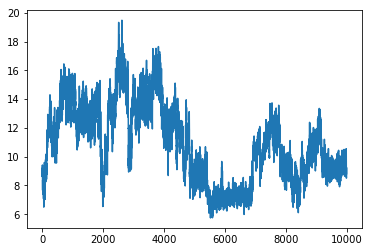

In [12]:
plt.figure()
plt.plot(data[:,1])

In [13]:
sample = headers[1]
print(sample)

THR4_ATP


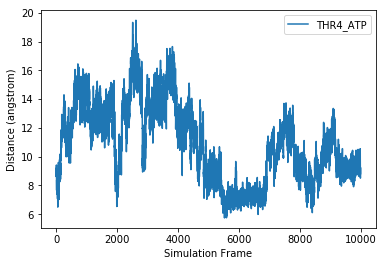

In [20]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
fig_1 = plt.plot(data[:,0], data[:,1], label=sample)
plt.legend()
plt.savefig(F'{sample}.png')

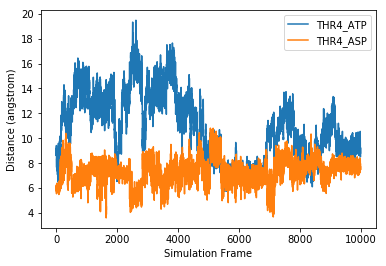

In [23]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1], label=headers[1])
plt.plot(data[:,2], label=headers[2])
plt.legend()
plt.savefig('two_samples.png')

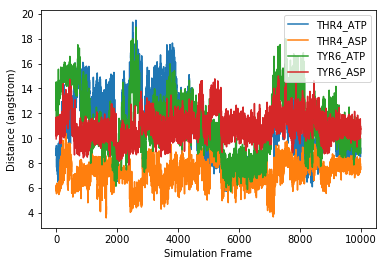

In [28]:
for col_number in range(1, len(headers)):
    fig = plt.plot(data[:,0], data[:,col_number], label=headers[col_number])
    plt.legend()
    
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.savefig('all_samples.png')

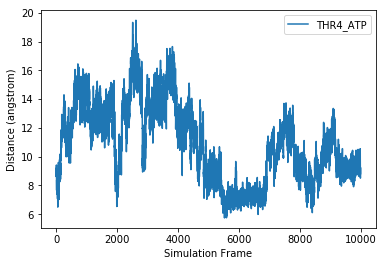

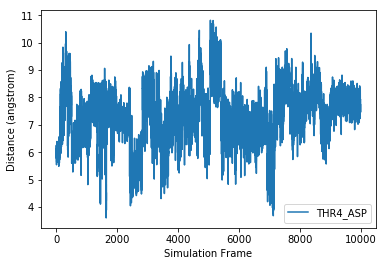

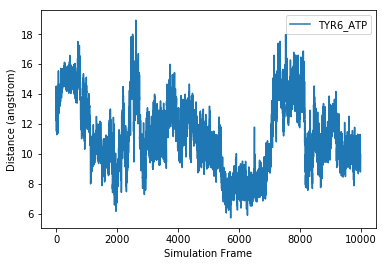

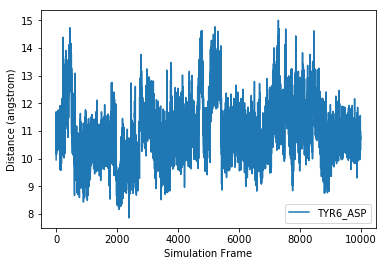

In [30]:
# Make a plot for each sample
for col_number in range(1, len(headers)):
    plt.figure()
    fig = plt.plot(data[:,0], data[:,col_number], label=headers[col_number])
    plt.legend()
    plt.xlabel('Simulation Frame')
    plt.ylabel('Distance (angstrom)')
    plt.savefig(F'{headers[col_number]}.png')